In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
data1 = pd.read_csv('Unemployment Analysis with Python\\Unemployment in India.csv')
data2 = pd.read_csv('Unemployment Analysis with Python\\Unemployment_Rate_upto_11_2020.csv')

In [28]:
print("First dataset preview:")
print(data1.head())
print("\nSecond dataset preview:")
print(data2.head())

First dataset preview:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Second dataset preview:
           Region         Date  F

In [29]:
print("Columns in dataset 1:", data1.columns)
print("Columns in dataset 2:", data2.columns)

Columns in dataset 1: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Columns in dataset 2: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [30]:
data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()

In [31]:
data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce')
data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce')

C:\Users\Tirth\AppData\Local\Temp\ipykernel_23544\3707565009.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce')
C:\Users\Tirth\AppData\Local\Temp\ipykernel_23544\3707565009.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce')


In [32]:
data1.dropna(subset=['Date'], inplace=True)
data2.dropna(subset=['Date'], inplace=True)

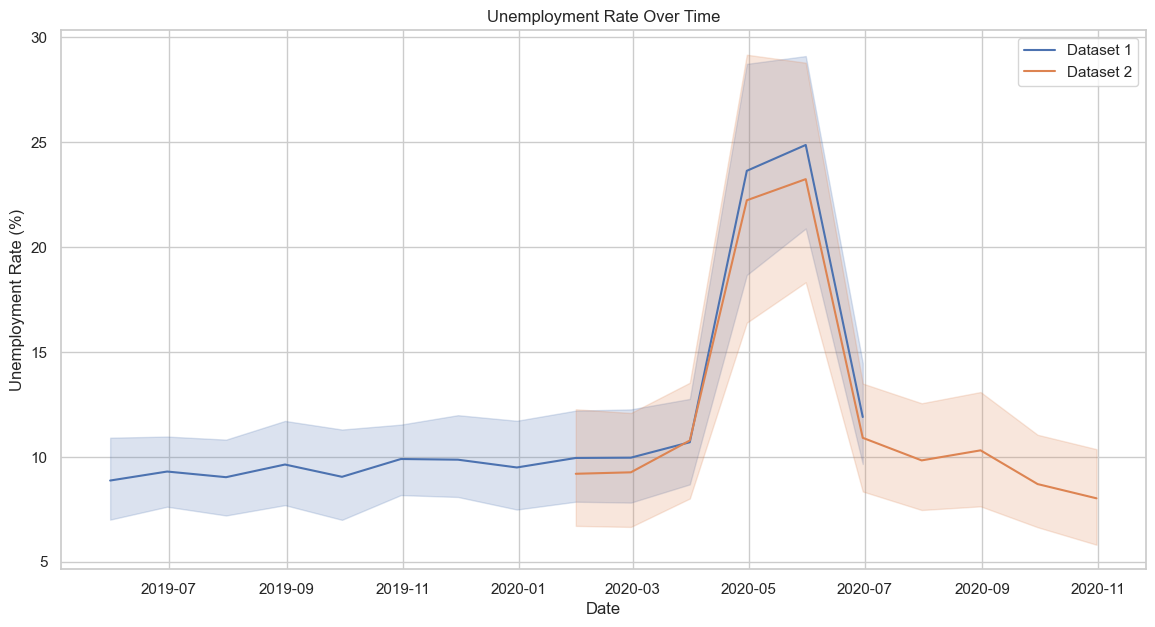

In [39]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=data1, x='Date', y='Estimated Unemployment Rate (%)', label='Dataset 1')
sns.lineplot(data=data2, x='Date', y='Estimated Unemployment Rate (%)', label='Dataset 2')
plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()

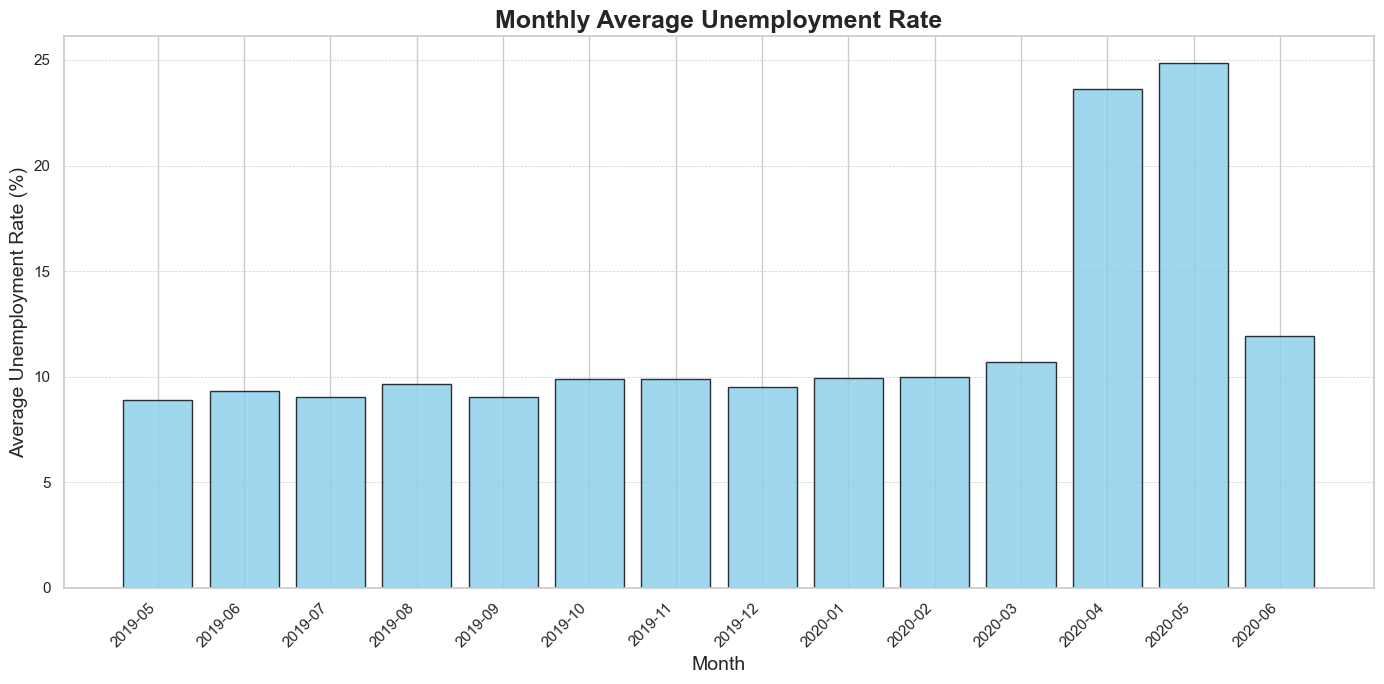

In [42]:
data1['Month'] = data1['Date'].dt.to_period('M')
monthly_avg = data1.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(14, 7))
plt.bar(monthly_avg.index.astype(str), monthly_avg.values, color='skyblue', edgecolor='black', alpha=0.8)

plt.title("Monthly Average Unemployment Rate", fontsize=18, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Unemployment Rate (%)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

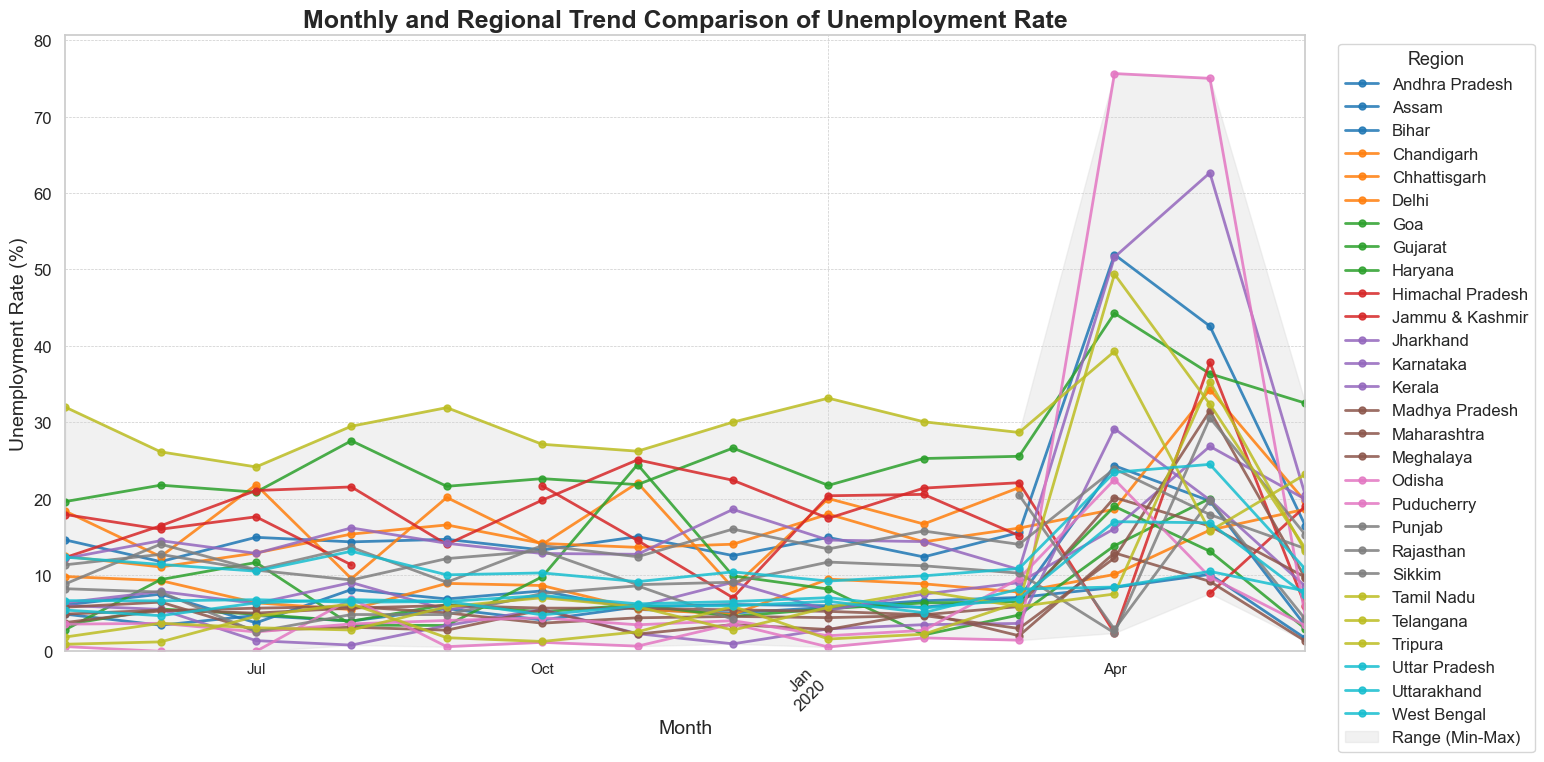

In [43]:

import seaborn as sns

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 8))

monthly_data.plot(
    kind='line',
    marker='o',
    markersize=5,
    linewidth=2.0,
    alpha=0.85,
    ax=ax,
    colormap='tab10'  
)


ax.fill_between(
    monthly_data.index.astype(str),
    monthly_data.min(axis=1),
    monthly_data.max(axis=1),
    color='lightgray',
    alpha=0.3,
    label="Range (Min-Max)"
)

ax.set_title("Monthly and Regional Trend Comparison of Unemployment Rate", fontsize=18, fontweight='bold')
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Unemployment Rate (%)", fontsize=14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.02, 1), title='Region', fontsize=12, title_fontsize=13)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

finite_values = monthly_data.values[np.isfinite(monthly_data.values)]
if finite_values.size > 0:
    plt.ylim(0, finite_values.max() + 5)

plt.grid(visible=True, linestyle='--', linewidth=0.5)

plt.show()


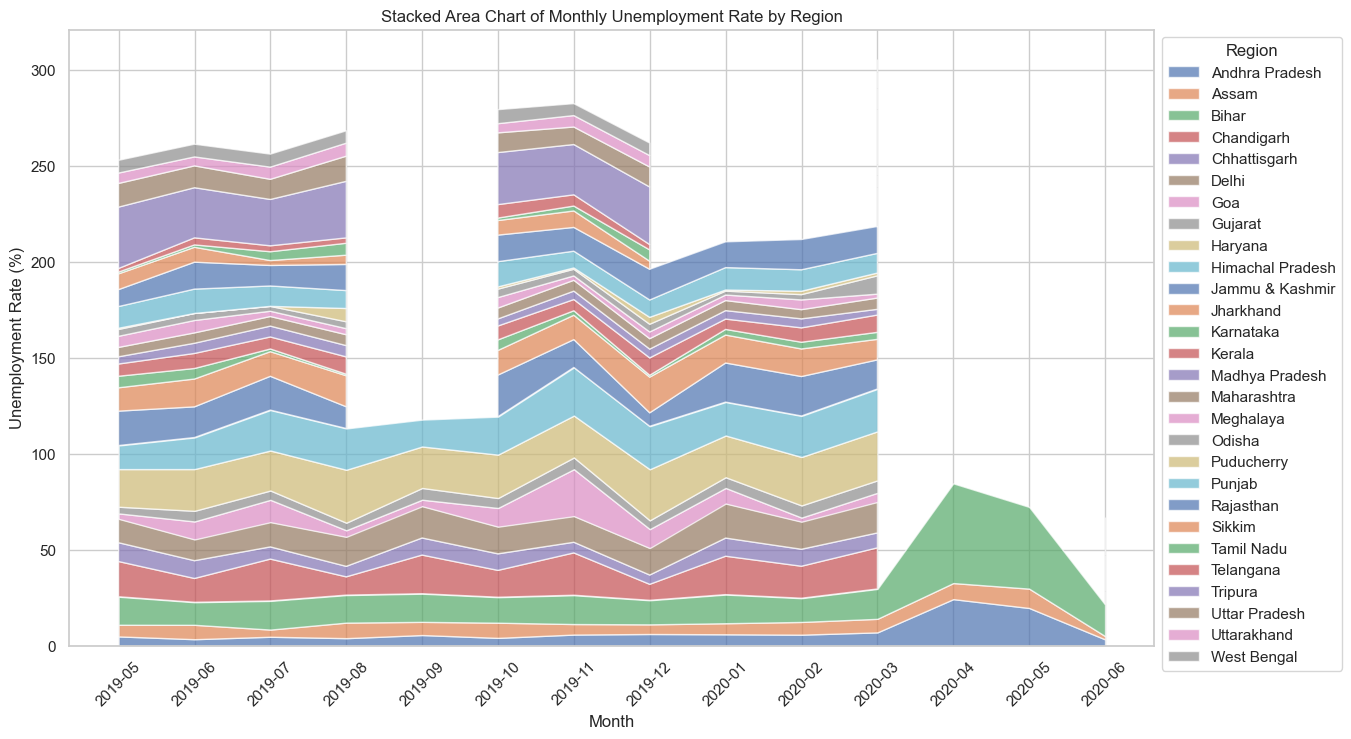

In [36]:
monthly_region_data = data1.pivot_table(index=data1['Date'].dt.to_period('M'), columns='Region', values='Estimated Unemployment Rate (%)', aggfunc='mean')

plt.figure(figsize=(14, 8))
plt.stackplot(monthly_region_data.index.astype(str), monthly_region_data.T, labels=monthly_region_data.columns, alpha=0.7)
plt.title("Stacked Area Chart of Monthly Unemployment Rate by Region")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Region')
plt.xticks(rotation=45)
plt.show()
